Columns in the dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Decision Tree Accuracy: 0.7750177430801988
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.59      0.48      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409

Decision Tree Confusion Matrix:
[[914 122]
 [195 178]]


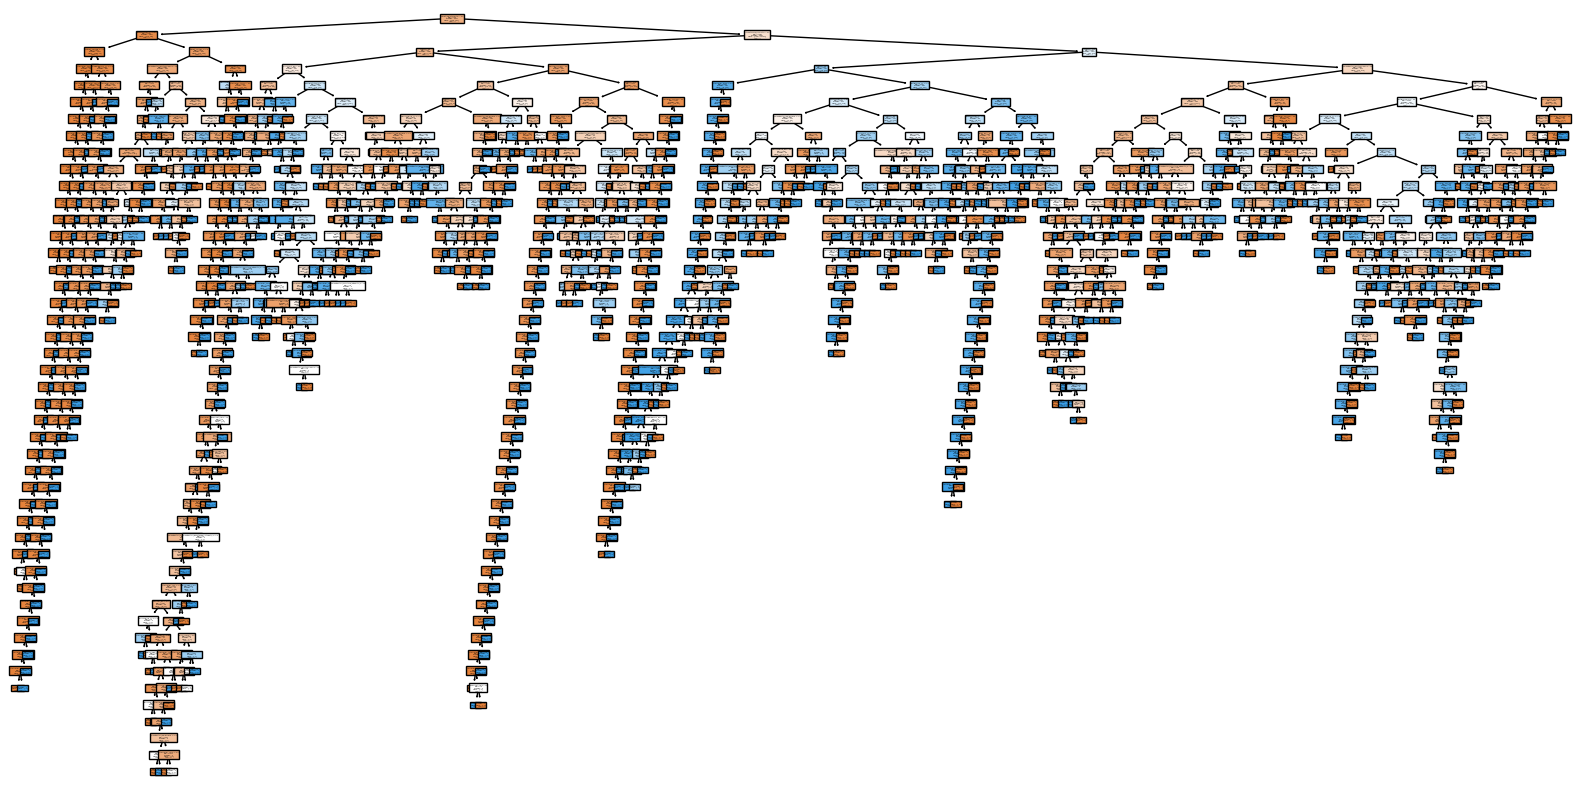

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\telco-churn.csv'
df = pd.read_csv(dataset_path)

# Check the columns in the dataset
print("Columns in the dataset:", df.columns)

# Define features and target
# Assuming 'Churn' is the target variable and 'customerID' is an ID column to be dropped
X = df.drop(columns=['customerID', 'Churn'], errors='ignore')
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary (0 and 1)

# Handle categorical variables if any
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()
